In [1]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Define the ticker for Binance Coin
bnb_ticker = yf.Ticker("BNB-USD")

# Check if the CSV file already exists
if os.path.exists("bnb.csv"):
    bnb = pd.read_csv("bnb.csv", index_col=0)
else:
    bnb = bnb_ticker.history(period="max")
    bnb.to_csv("bnb.csv")

<Axes: xlabel='Date'>

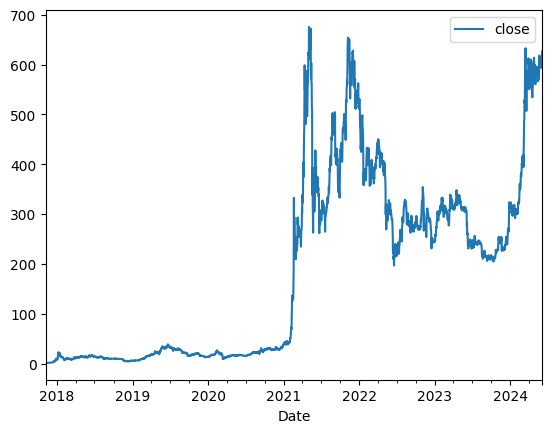

In [3]:
# Convert index to datetime
bnb.index = pd.to_datetime(bnb.index)

# Remove unnecessary columns
del bnb["Dividends"]
del bnb["Stock Splits"]

# Convert column names to lowercase
bnb.columns = [c.lower() for c in bnb.columns]

# Plot the closing price
bnb.plot.line(y="close", use_index=True)

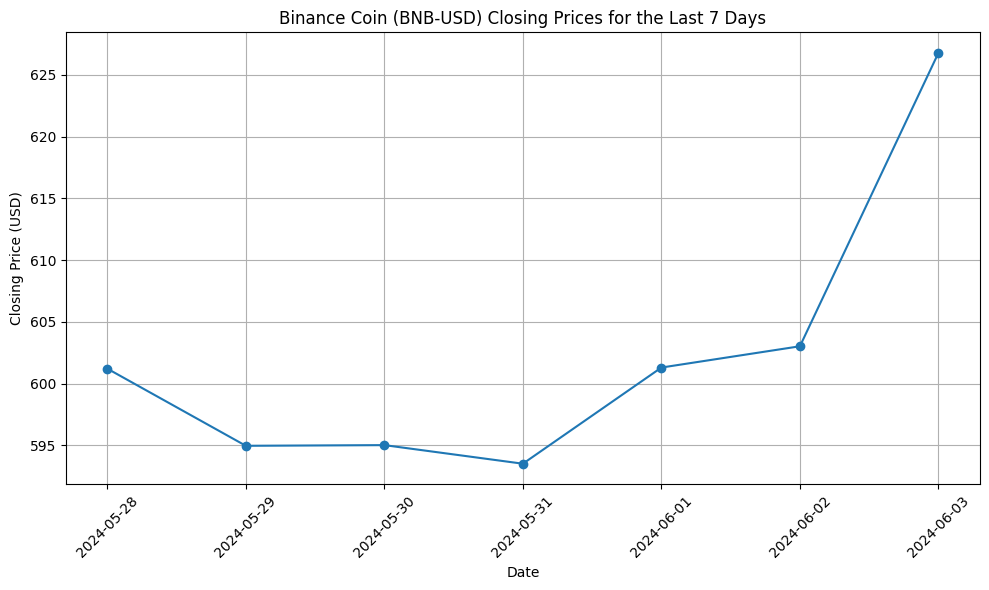

In [4]:
# Filter the data for the last seven days
last_seven_days_bnb = bnb[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_bnb.index, last_seven_days_bnb['close'], marker='o')
plt.title('Binance Coin (BNB-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()